[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/dm4bem-2023/project-thb-beauquis/HEAD)

# Projet thermique du bâtiment: modélisation d'une local cubique en milieu réel

# I. Introduction et hypothèses



Ce projet s'incrit dans le cours de Thermique du Bâtiment. Son objectif est d'apprendre à modéliser d'un point de vue thermique une structure s'approchant de la réalité afin de simuler et d'analyser les transferts thermiques qui régissent le comportement du bâtiment. Dans notre cas, nous nous proposons d'étudier un local cubique simple, soumis à des conditions climatiques réelles.

## I.1. Description du bâtiment


Les différentes descriptions ci-dessous sont principalement tirées du « mini-projet cube » disponible sur Moodle. Notre objectif pour ce projet étant de modéliser un local similaire au cube étudié, mais divergeant sur certains points (détails en dessous). Nous n’avons donc pas cherché à modifier les différents paramètres (tel que l’épaisseur des murs ou l’orientation du soleil), par soucis de simplification. Cela afin de complexifier d’autres aspects du cube, comme passer d’un régime stationnaire à un régime dynamique, en intégrant les capacités des murs.

**Description du local et géométrie :**
Le local cubique est composé de la sorte : trois faces verticales béton-isolant et une face verticale entièrement vitrée. La face vitrée est orientée plein sud.
Le cube n’est plus surélevé par rapport au sol et on a donc un contact cube-sol sur la face inférieure.
Au niveau de la face supérieure, on a une composition identique à celles des parois verticales.
Longueur d’une arrête du cube : L donc $S_{face} = L^2$.

**Données extérieures :**
- La vitesse du vent est connue, constante et vaut v = 2 m/s
- L’azimut du soleil par rapport au sud est de 0°, la vitre reçoit ainsi un ensoleillement maximal.
- Le rayonnement solaire diffus isotrope est de 100 W/$m^2$
- Coefficient d’échange convectif extérieur hce = 2 + 4v = 10 W/$m^2$
- Coefficient d’échange convectif intérieur hci = 4 W/$m^2$

**Propriétés des matériaux :**
-	Béton : λbéton = 2 W/mK, ebéton = 0.05 m, ρbétonCbéton = 2.5 * 106 J/K$m^3$
-	Isolant : λisolant = 0.04 W/mK, eisolant  = 0.04m, ρisolantCisolant = 2.0 * 104 J/K$m^3$
-	Vitre : λvitre = 1.2W / mK, evitre =5 .10-3 m, ρvitreCvitre = 2 *106 J / K$m^3$
-	 αint = αi = 1 en GLO et alpha v en clo et to = 1 -alpha clo
-	en GLO αi = ϵi= 0,9 γi en CLO αi = 0,8 γi i

**Hypothèse sur les longueurs d’ondes :**
On ne considère que les GLO pour les murs, et que les CLO pour la vitre.
Ventilation Mécanique Contrôlée et chauffage :
On installe une VMC au sein du local qui permet d’extraire un débit volumique Qvex = 30 $m^3$/h. 
Un système de chauffage par convection permet de dissiper une puissance convective P.


![Schedma_dessus.png](Figures/Schema_dessus.png)
> Figure 1. Schéma cube en coupe vu de dessus (côtes en cm)


## I.2. Hypothèses prises en compte dans l'étude





Pour se lancer dans notre étude, nous réalisons quelques hypothèses simplificatrices, proches de la réalité.



Pour commencer, nous considérons que la température du sol sur lequel repose le bâtiment varie selon la profondeur considérée. Dans ce cas, le sol peut être considéré comme comme un milieu unidimensionnel semi-infini. Ce milieu est soumis sur sa face supérieure à une variation de température périodique T(0,t) = To + ΔT cos(ωt). Cependant, nous considérons dans notre étude que la température du sol reste constante à une profondeur de 3m, avec pour valeur 13°C.





Nous considérons ensuite que la vitre possède une épaisseur faible par rapport à ses autres dimensions. Dans ce cas, nous pouvons approximer que la variation de température au sein de celle-ci est extrêmement faible et par conséquent, qu'il n'est pas nécessaire de discrétiser de façon précise la vitre dans son épaisseur. Cela nous permet ainsi de considérer la température indépendante de la position en épaisseur au sein de la vitre.






Enfin, en ce qui concerne les rayonnements agissants sur la vitre, nous réalisons plusieurs hypothèses. Celles-ci s'appuient principalement sur la loi du déplacement de Wien. Celle-ci relie la longueur d'onde pour laquelle l'intensité est maximale à la température de la source:
$$ {λ_{max}} = \frac{σ_ω}{T} \qquad avec \; {σ_ω}=hc=2,90*10^{-3}  m \cdot K $$

De cette façon, nous considérons que le rayonnement solaire reçu est uniquement constitué de courtes longeurs d'onde (CLO), la température de la source étant extrêmement élevée (5 772 K). La vitre, transmettant le rayonnement solaire à l'intérieur du bâtiment, sera considérée comme un corps gris ne réflechissant aucun rayonnement (tout le rayonnement est absorbé ou transmis). En ce qui concene le rayonnement solaire transmis par la vitre, celui-ci sera considédéré reparti également entre chaque paroi intérieure. Les parois intérieures seront elles considérées comme des corps noir, absorbant l'ensemble des rayonnements et émettant un rayonnement thermique en s'échauffant.
 
 ![rayonnement_solaire.png](Figures/rayonnement_solaire.png)
> Figure 2. Spectre du rayonnement solaire (source: Wikipedia).

Cependant, nous considérons le rayonnement thermique émis par les parois (en dehors de la vitre), comme uniquement consitué de rayonnement en de grandes longeurs d'onde (GLO), la température du bâtiment étant grossièrement comprise en 5°C (278 K) et 40°C (313 K) dans la région lyonnaise à notre époque.



# II. Théories générales



Il est possible de représenter notre système par un schéma électrique, lequel sera construit comme il suit. Dans un schéma de ce type, les noeuds représentent les températures. Celles-ci seront groupées dans une matrice θ.

## II.1. Conduction


Un phénomène de conduction peut être représenté dans notre circuit (parois planes uniquement) par une résistance dont la valeur est définie comme il suit :

$$ R_{cd}(K/W)=\frac {e}{λS}\qquad avec \; {e}\;l'\;épaisseur\;du\;mur(m),\;λ\;la\;conductivité\;thermique\;(W/m \cdot K),\;S\;la\;surface\;de\;la\;paroi\;considérée\;(m^2) $$

## II.2. Convection



Un phénomène de convection peut être représenté dans notre circuit par une résistance dont la valeur est définie comme il suit :

$$ R_{cv}(K/W)=\frac {1}{hS}\qquad avec \; h\;le\;coefficient\;de\;convection\;associé\;à\;la\;paroi\;(W/m^2 \cdot K),\;S\;la\;surface\;de\;la\;paroi\;considérée\;(m^2) $$

## II.3. Radiation


![rayonnement émittance temp.png](Figures/rayonnement_emittance_temp.png)
> Figure 3. Équivalence entre une modélisation avec des sources d'émittance et une modélisation avec des sources de température.

Le phénomène de radiation est généralement décrit à l'aide de sources d'émittance, élément qui n'est pas acceptable dans notre modèle où les sources seront uniquement des sources de température. Pour adapter modélisation avec des sources d'émittance en une modélisation avec des sources de température, il est nécessaire de considérer l'équivalence suivante:
- La valeur des résistance est modifiée. Pour les résistances issues de la modélisation avec les émittances, on a  :
    $$ R_{1}^{émittance}(m^{-2})=\frac {1-ε_1}{ε_1 \cdot S_1} \qquad avec \; ε_1\;l'émissivité\;de\;la\;surface\;S_1\;,\;S_1\;la\;surface\;de\;la\;paroi\;1\;(m^2) $$
    $$ R_{1,2}^{émittance}(m^{-2})=\frac {1}{F_{1,2} \cdot S_1}=\frac {1}{F_{2,1} \cdot S_2} \qquad avec \; F_{1,2}\;le\;facteur\;de\;force\;entre\;la\;surface\;S_1\;et\;la\;surface\;S_2 $$
    $$ R_{2}^{émittance}(m^{-2})=\frac {1-ε_2}{ε_1 \cdot S_2} \qquad avec \; ε_2\;l'émissivité\;de\;la\;surface\;S_2\;,\;S_2\;la\;surface\;de\;la\;paroi\;2\;(m^2) $$
- Pour les sources : les émittances sont remplacées par les températures. Pour cela, il est nécessaire de linéariser l'équation en $T^4$ qui régit les échanges en terme d'émittance. Pour cela, nous obtenons alors :
    $$T_1^4 - T_2^4 = (T_1^2 + T_2^2)(T_1^2 - T_2^2) = (T_1^2 + T_2^2)(T_1 + T_2)(T_1 - T_2) = 4 \bar{T}^3 (T_1 - T_2)$$
    où la température $\bar{T}$ est :
    $$\bar{T}(K) =\sqrt[3]{ \frac{(T_1^2 + T_2^2)(T_1 + T_2)}{4}}$$

- Pour tenir compte de cette modification, les résistances équivalentes pour une modélisation avec des sources de températures deviennent alors :
    $$ R_{1}(m^{-2})=\frac {1-ε_1}{4σ \cdot \bar{T}^3 \cdot ε_1 \cdot S_1} $$
    $$ R_{1,2}(m^{-2})=\frac {1}{4σ \cdot \bar{T}^3 \cdot F_{1,2} \cdot S_1}=\frac {1}{4σ \cdot \bar{T}^3 \cdot F_{2,1} \cdot S_2}$$
    $$ R_{2}(m^{-2})=\frac {1-ε_2}{4σ \cdot \bar{T}^3 \cdot ε_2 \cdot S_2} $$







## II.4. Advection

Un phénomène d'avection peut être représenté dans notre circuit par une résistance dont la valeur est définie comme il suit :

$$ R_{adv}(K/W)=\dot {m_a} \cdot c_a=ρ_a \cdot c_a \cdot \dot {V_a}$$
$$ avec \; \dot {m_a}\;le\;flux\;de\;masse\;d'air\;déplacée\;(kg/s \cdot K),\;c_a\;la\;capacité\;calorifique\;spécifique\;de\;l'air\;(J/kg \cdot s),\;\dot {V_a}\;le\;flux\;du\;volume\;d'air\;déplacé\;(m^3/s),\;ρ_a\;la\;densité\;de\;l'air\;(kg/m^3) $$

## II.5. Controleur

Pour pouvoir étudier les consommations thermiques nécessaires au maintient d'une température dans le local, nous modélisons un controlleur prenant deux valeurs distinctes suivant l'étude voulue:
- variation libre de la température interne : on prendra alors $K_c = 0$.
- variation controlée de la température interne à une valeur de température définie : on prendra alors $K_c = +∞ $.

Ce controleur n'a finalement pas pu être implémenté et sera remplacé par une source de chaleur P, dont nous déterminerons la valeur par une méthode itérative.


## II.6. Capacités thermiques

La capacité thermique d'un matériau correspond à la quantité de chaleur que celui-ci peut emmagasiner par rapport à son poids. Elle caractérise la quantité de chaleur qu'il faut apporter à un 1 mètre cube de matériau pour augmenter sa température de 1°C. Dans le cas d'un modèle dynamqique, il est indispensbale de considérer les capacités termiques pour être le plus proche possible de la réalité dans laquelle une paroi peut emmaganiser de l'énergie pour le distribuer à un temps ultérieur (déphasage). Une capacité thermique peut être représentée dans notre circuit par un condensateur dont la valeur est définie comme il suit :
$$ C(J/kg) =  ρ\cdot c \cdot V \qquad avec \;ρ\;la\;densité\;du\;matériau\;(kg/m^3),\;c\;la\;capacité\;calorifique\;spécifique\;du\;matériau\;(J/kg \cdot K),\;V\;le\;volume\;de\;la\;paroi\;(m^3) $$

## II.7. Sources et rayonnement solaire


Le modèle de sources de température représente les températures qui varient indépendamment de ce qui se passe dans le circuit thermique. Ces sources de températures sont les entrées du modèle physique. Dans notre cas, les sources de température sont les suivantes :

- Température de l'air extérieur et température du sol ;
- Source de température à l'intérieur du cube, placé en son centre et pouvant correspondre à un chauffage n'inflençant pas les autres éléments (parois);
- Ensoleillement solaire absorbé par les surfaces extérieures du cube:
    $$ \Phi_{solaire} = ⍺ \cdot S \cdot E $$
    $$ avec \;⍺\;le\;coefficient\;d'absoption\;de\;la\;surface\;en\;grande\;longeur\;d'onde,\;S\;la\;surface\;de\;la\;paroi\;(m^2),\;E\;l'ensoleillement\;solaire\;direct\;ou\;diffu\;atteignant\;la\;paroi\;(W/m^2)$$
- Ensoleillement solaire transmis par la vitre aux surfaces intérieurs du cube:
    $$ \Phi_{solaire\;transmis\;vitre} = 𝒯_{vitre\;CLO} \cdot S \cdot E_{direct} = (1-⍺_{vitre CLO}) \cdot S \cdot E_{direct} $$
    $$ avec \;⍺\;le\;coefficient\;d'absoption\;de\;la\;surface\;en\;grande\;longeur\;d'onde,\;S\;la\;surface\;de\;la\;paroi\;(m^2),\;E\;l'ensoleillement\;solaire\;direct\;atteignant\;la\;paroi\;(W/m^2)$$
    et on considérera donc 
    $$ \Phi_{recu\;au\;travers\;de\;la\;vitre\;par\;chaque\;paroi} = \dfrac{1}{5} \cdot 𝒯_{vitre\;CLO} \cdot S \cdot E_{direct} = \dfrac{1}{5} \cdot (1-⍺_{vitre CLO}) \cdot S \cdot E_{direct} $$
    $$ avec \;⍺\;le\;coefficient\;d'absoption\;de\;la\;surface\;en\;grande\;longeur\;d'onde,\;S\;la\;surface\;de\;la\;paroi\;(m^2),\;E\;l'ensoleillement\;solaire\;direct\;atteignant\;la\;paroi\;(W/m^2)$$




# III. Solution matricielle

![matrices.png](Figures/matrices.png)
> Représentation matricielle du système

En appliquant la méthodologie précédente, nous pouvons construire les matrices suivantes :
- Matrice d'incidence A : matrice qui représente les relations entre les différents composants d'un système.
- Matrice de conductance G : matrice qui représente les conductances thermiques entre différents éléments d'un système.
- Matrice de capacité C : matrice qui décrit les capacités thermiques des composants d'un système.
- Vecteur de source de température b : vecteur qui spécifie les sources de température du système.
- Vecteur de source de débit f : vecteur qui représente les sources de débit du système.

Grâce à celle-ci, il est possible d'obtenir une solution numérique matricielle telle que :
![equa_diff.png](Figures/equa_diff.png)




# IV. Application au problème

Grâce aux éléments théoriques présentés ci-dessus, nous modélisons notre bâtiment de la façon suivante :


![Alt text](Figures/Schema_elec_1.svg)
> Schéma électrique complet faisant apparaitre l'ensemble des éléments d'étude.

![Alt text](Figures/Schema_elec_2.svg)
> Schéma électrique réduit faisant apparaitre la nomenclature utilisée dans le reste du code.



**Détail de la discrétisation d'une paroi** : 

Il est essentiel de ne pas considérer d'un seul tenant les parois dont l'épaisseur n'est pas négligeable devant ses autres dimensions (cas des murs composés de béton et d'isolant). En effet, pour proposer un modèle le plus proche possible de la réalité, il est essentiel de discrétiser le mur en plusieurs épaisseurs de même taille. Cette méthode nous permet de répartir plus équitablement la capacité thermique des éléments.

En effet, lors de la discrétisation, il est obligatoire de modéliser la capacité termique au centre de deux épaisseurs de taille identique. Cependant, cette approche nous oblige à considérer l'épaisseur ainsi créée comme ayant une température homogène. Cette approche s'éloigne ainsi de la réalité, la température évoluant selon la position dans l'épaisseur du mur.
Pour se rapprocher au plus proche de la réalité, il faut ainsi réduire l'épaisseur considérée dans la discrétisation et multiplier le nombres d'épaisseurs. De cette façon, l'épaisseur étant réduit, il est acceptable de considérer la température constante en son sein.

Dans notre cas, nous avons choisi de discrétiser la couche de béton en quatres sous-couches d'épaisseur identique tandis que la couche d'isolant est divisée en deux sous-couches identiques. De cette façon, nous nous rapprochons considérablement du comportement réel de la paroi, même si pour s'approcher au plus de celui-ci il serait nécessaire de considérer des sous-couches d'épaisseur infinitésimalement petite.


![Alt text](Figures/mur_discretisation.svg)
> Représentation de la discrétisation adoptée (source: cghiaus.github.io)


# V. Résolution numérique

## V.1. Résolution dans le cas statique

### Code: importation des différents modules

In [17]:
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

### Code: données d'entrée

In [18]:
#définition des variables

hc_ext = 2+4*2 #W/m^2.K
hc_int = 4 #W/m^2.K
S_paroi = 3*3 #m^2
T_ext = 11+273.15 #K
T_sol = 5+273.15 #K

λ_beton = 2 #W/m.K
e_beton = 0.2 #m
V_beton = S_paroi * e_beton
rho_c_beton = 2.5e6 #J/K.m^3

λ_isolant = 0.04 #W/m.K
e_isolant = 0.08 #m
V_isolant = S_paroi * e_isolant
rho_c_isolant = 2.0e4 #J/K.m^3

λ_vitre = 1.2 #W/m.K
e_vitre = 5e-3 #m

λ_sol = 0.9 #W/m.K
e_sol = 3 #m

α_GLO = 0.9
α_CLO = 0.8

E_diffus = 100 #W/m^2
E_horizontal = 300 #W/m^2
P = 0 #W

ɛ_i = 0.92 
ɛ_v = 0.89

σ = 5.67e-8 #W/m^2.K^4

Q_vex = 30 #m^3/h
rho_air = 1.225 #kg/m^3
c_air = 1000 #J/K.kg


### Code: Matrice A

In [19]:
def create_A():
    global central_com, central
    np.set_printoptions(threshold=np.inf)

    A = np.zeros((64,43))
    central = []

    #Faces béton-isolant

    for j in range (0,5):
        j1 = j*9
        j2 = j*8
        A[j1,j2] = 1
        for i in range (1,8):
            A[j1+i,j2+i] = 1
            A[j1+i,j2+i-1] = -1
        A[j1+8,j2+7] = -1
        A[j1+8,42] = 1
        central.append(j2+7)

    # Face vitrée 

    A[45,40] = 1
    A[46,40] = -1
    A[46,41] = 1 
    A[47,41] = -1
    A[47,42] = 1
    central.append(41)
    central_com = list(it.combinations(central,2))
    A[63,42] = 1

    #Echanges radiatifs

    for i in range (0,15):
        A[48+i,central_com[i][0]] = -1
        A[48+i,central_com[i][1]] = 1
    return A

### Code: Matrice G

In [20]:
def create_G():

    global R
    R = []
    G = np.zeros((64,64))

    R_A1 = 1/(hc_ext*S_paroi)
    R_A2 = e_beton/(8*λ_beton*S_paroi)
    R_A3 = e_beton/(4*λ_beton*S_paroi)
    R_A4 = e_beton/(4*λ_beton*S_paroi)
    R_A5 = e_beton/(4*λ_beton*S_paroi)
    R_A6 = e_isolant/(4*λ_isolant*S_paroi)+e_beton/(8*λ_beton*S_paroi)
    R_A7 = e_isolant/(2*λ_isolant*S_paroi)
    R_A8 = e_isolant/(4*λ_isolant*S_paroi)
    R_A9 = 1/(hc_int*S_paroi)

    for i in range (5):
        R.append(R_A1)
        R.append(R_A2)
        R.append(R_A3)
        R.append(R_A4)
        R.append(R_A5)
        R.append(R_A6)
        R.append(R_A7)
        R.append(R_A8)
        R.append(R_A9)
        
    R[len(R)-1] = 3/λ_sol*S_paroi


    R_V2 = e_vitre/(λ_vitre*S_paroi)

    R.append(R_A1)
    R.append(R_V2)
    R.append(R_A9)

    R_VMC = ((1-0.9)*Q_vex*rho_air*c_air/60)**-1

    for i in range(15):
        R.append(1)
        
    R.append(R_VMC)

    for i in range (len(R)):
        G[i,i] = R[i]**(-1)
        
    
        
    return G

### Code: Matrice C

In [21]:
def create_C():
    
    C_beton = S_paroi*e_beton*rho_c_beton
    C_isolant = S_paroi*e_isolant*rho_c_isolant

    C_liste = []

    for i in range(5):
        C_liste.append(0)
        for j in range (4):
            C_liste.append(C_beton/4)
        for j in range (2):
            C_liste.append(C_isolant/2)
        C_liste.append(0)

    for i in range(3):
        C_liste.append(0)

    C = np.zeros((43,43))

    for i in range (len(C_liste)):
        C[i,i] = C_liste[i]
    return C

### Code: Matrice B

In [22]:
def create_B():
    B = np.zeros(64)

    for i in range(4):
        B[9*i] = T_ext 

    B[36] = T_sol

    B[45] = T_ext

    B[63] = T_ext
    return B

### Code: Matrice f

In [23]:
def create_f(P):
    f_1 = α_GLO*E_diffus*S_paroi
    f_2 = α_GLO*E_diffus*S_paroi
    f_3 = α_GLO*E_diffus*S_paroi
    f_4 = α_GLO*E_diffus*S_paroi
    f_5 = α_CLO*E_horizontal*S_paroi
    f_6 = (1-α_CLO)*E_horizontal*S_paroi*0.2


    f = np.zeros(43)

    f[0] = f_1
    f[8] = f_2
    f[16] = f_3
    f[24] = f_4
    f[40] = f_5
    f[7] = f_6
    f[15] = f_6
    f[23] = f_6
    f[31] = f_6
    f[39] = f_6
    f[42] = P


    return f

### Calcul de la température aux différents points

In [24]:
A = create_A()
G = create_G()
B = create_B()
f = create_f(0)

θ = np.linalg.inv((np.transpose(A)@G@A))@(np.transpose(A)@G@B+f)

θ_deg = θ-273.15

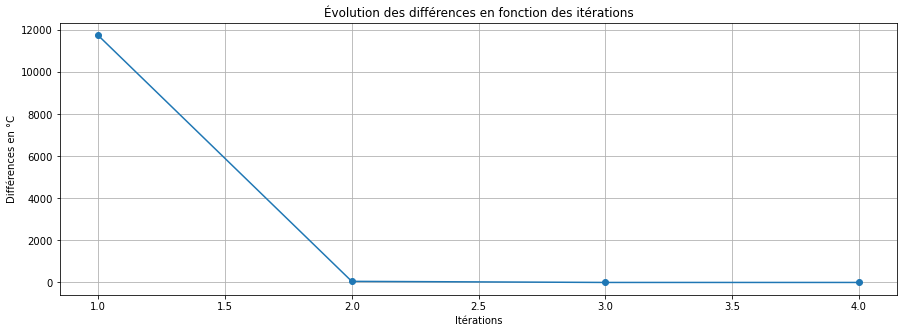

In [25]:
detail = {7:ɛ_i,15:ɛ_i,23:ɛ_i,31:ɛ_i,39:ɛ_i,41:ɛ_v}

tol = 0.0001

dif = 1

θ = np.ones(43)*20

ite = 1

liste_dif = []
compteur = []

while dif > tol :
    
    dif = 0
    
    R_ray = []
    for a,b in central_com:
        R_ray.append((1-detail[a])/(detail[a]*4*σ*((θ[a]+θ[b])/2)**4*S_paroi)+(1/(4*σ*((θ[a]+θ[b])/2)**4*S_paroi*0.2))+(1-detail[b])/(detail[b]*4*σ*((θ[a]+θ[b])/2)**4*S_paroi))
    for i in range (len(R_ray)):
        G[48+i,48+i] = R_ray[i]**(-1)
    θ_prev = θ
    θ = np.linalg.inv((np.transpose(A)@G@A))@(np.transpose(A)@G@B+f)
    
    for i in range(len(θ)):
        dif += abs(θ[i]-θ_prev[i])
    liste_dif.append(dif)
    compteur.append(ite)
    ite += 1

# Tracer le graphique
plt.figure(figsize=(15, 5))
plt.plot(compteur, liste_dif, marker='o', linestyle='-')
plt.title("Évolution des différences en fonction des itérations")
plt.xlabel("Itérations")
plt.ylabel("Différences en °C")
plt.grid(True)
plt.show()



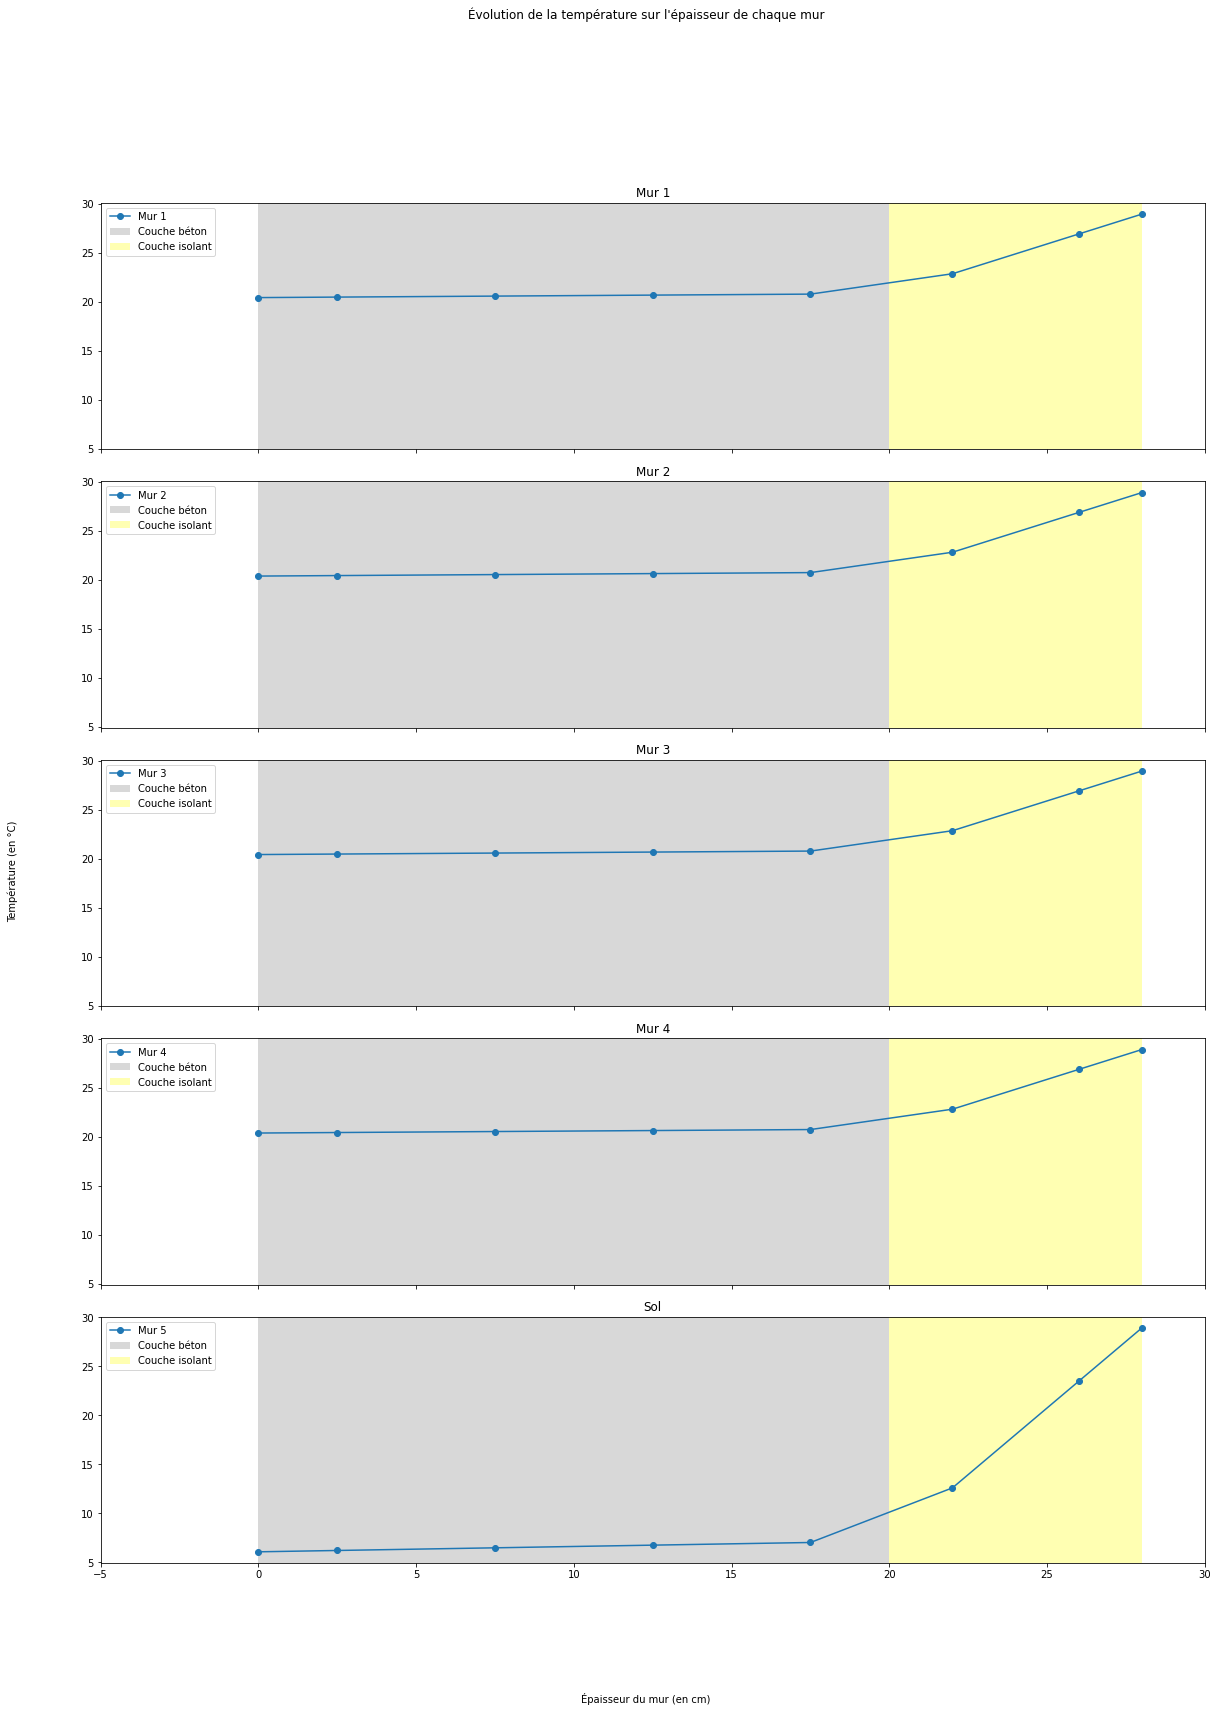

In [26]:
nombre_murs = 5

valeurs_par_mur = 8

# Créer une figure avec des sous-graphiques pour chaque mur
fig, axs = plt.subplots(nombre_murs, 1, figsize=(20, 25), sharex=True, sharey=True)

#placement des différents points de température
x = [0,2.5,7.5,12.5,17.5,22,26,28]

# Tracer un graphique pour chaque mur
for i in range(nombre_murs):
    debut = i * valeurs_par_mur
    fin = (i + 1) * valeurs_par_mur
    mur =  θ[debut:fin]-273.15

    axs[i].plot(x,mur, label=f'Mur {i+1}', marker = 'o')
    axs[i].set_title(f'Mur {i+1}')
    axs[i].set_xlim(-5,30)
    axs[i].axvspan(0, 20, facecolor='gray', alpha=0.3, label='Couche béton')
    axs[i].axvspan(20, 28, facecolor='yellow', alpha=0.3, label='Couche isolant')
    axs[i].legend()
    
axs[4].set_title('Sol')

# Ajouter des légendes et des titres globaux
fig.suptitle("Évolution de la température sur l'épaisseur de chaque mur")
fig.text(0.5, 0.04, "Épaisseur du mur (en cm)", ha='center', va='center')
fig.text(0.06, 0.5, "Température (en °C)", ha='center', va='center', rotation='vertical')
fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.9])
plt.show()

## V.2. Calcul au cours du temps 

In [202]:
#importation du jeu de données en fonction du temps 

data = []
with open('input_data_set.csv','r',encoding = 'utf-8') as f:
    fichier = csv.reader(f,delimiter = ',')
    titres = fichier.__next__()
    for row in fichier:
        data.append([float(row[1]),float(row[3]),float(row[6])])

In [233]:
#liste stockant les températures aux différentes heures avant et après régulation et la puissance de régulation
liste_finale = [] 

#on parcourt l'ensemble de la liste des données en fonction du temps pour déterminer nos températures à chaque instant
for data_h in data:
    T_inte = False
    P = 0
    plus = ''
    liste_θ = []
    
    #boucle permettant de connaître la puissance nécessaire pour maintenir la pièce aux alentours de 20°C
    while T_inte == False:
        if plus == 'oui':
            P+= 100
        elif plus == 'non': 
            P -= 100
            
        A = create_A()
        G = create_G()
        B = create_B()
        f = create_f(P)   
        
        # modification du flux absorbé par les murs béton
        
        f[0] = data_h[1]
        f[8] = data_h[1]
        f[16] = data_h[1]
        f[24] = data_h[1]

        # modification du flux absorbé par la face vitrée

        f[40] = data_h[2]

        #modification de la température extérieure

        B[45] = data_h[0]
        B[63] = data_h[0]
        B[45] +=273.15
        B[63] +=273.15

        #on initialise la tolérance, la différence, le compteur d'itérations ainsi que les valeurs initiales pour povouir initier la boucle
        tol = 0.0001        
        dif = 1
        θ = np.ones(43)*20
        ite = 1

        liste_dif = []
        compteur = []
        
        #boucle permettént de déterminer la température aux différents points
        while dif > tol :

            dif = 0

            R_ray = []
            for a,b in central_com:
                R_ray.append((1-detail[a])/(detail[a]*4*σ*((θ[a]+θ[b])/2)**4*S_paroi)+(1/(4*σ*((θ[a]+θ[b])/2)**4*S_paroi*0.2))+(1-detail[b])/(detail[b]*4*σ*((θ[a]+θ[b])/2)**4*S_paroi))
            for i in range (len(R_ray)):
                G[48+i,48+i] = R_ray[i]**(-1)
            θ_prev = θ
            θ = np.linalg.inv((np.transpose(A)@G@A))@(np.transpose(A)@G@B+f)

            for i in range(len(θ)):
                dif += abs(θ[i]-θ_prev[i])
            liste_dif.append(dif)
            compteur.append(ite)
            ite += 1

        liste_θ.append(θ-273.15)
        
        #on vérifie si la puissance doit être modifiée afin de s'approcher de 20°C
        plus_prev = plus
        if liste_θ[len(liste_θ)-1][42] > 20:
            plus = 'non'
        elif liste_θ[len(liste_θ)-1][42] < 20:
            plus = 'oui'
        else: 
            T_inte = True 
        if plus_prev != plus and plus_prev != '':
            T_inte = True
            
        
    liste_finale.append([liste_θ[0][42],P,liste_θ[len(liste_θ)-1][42]])   

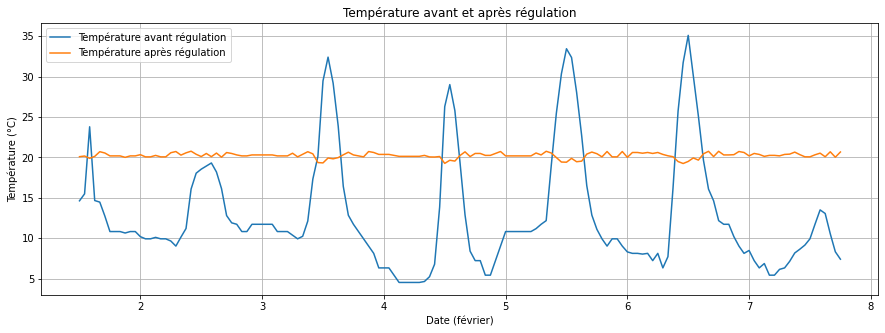

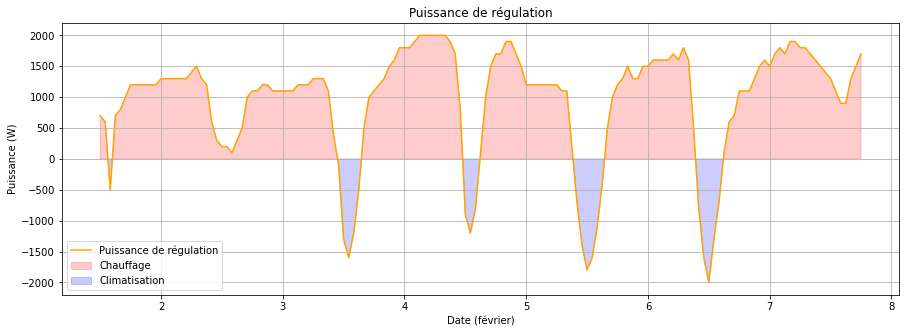

In [228]:
x = [1.5+i*1/24 for i in range(len(liste_finale))]


temperature_sans_regulation = [i[0] for i in liste_finale]
puissance_regulation = [i[1] for i in liste_finale]
temperature_apres_regulation = [i[2] for i in liste_finale]

# Tracer le graphique de température avant et après régulation
plt.figure(figsize=(15, 5))
plt.plot(x,temperature_sans_regulation, label='Température avant régulation')
plt.plot(x,temperature_apres_regulation, label='Température après régulation')
plt.xlabel('Date (février)')
plt.ylabel('Température (°C)')
plt.title('Température avant et après régulation')
plt.legend()
plt.grid(True)
plt.show()

# Tracer le graphique de puissance de régulation
plt.figure(figsize=(15, 5))
plt.plot(x,puissance_regulation, label='Puissance de régulation', color='orange')
plt.fill_between(x, 0, puissance_regulation,
                 where=(np.array(puissance_regulation) >= 0), interpolate=True, color='red', alpha=0.2, label='Chauffage')
plt.fill_between(x, 0, puissance_regulation,
                 where=(np.array(puissance_regulation) < 0), interpolate=True, color='blue', alpha=0.2, label='Climatisation')

plt.xlabel('Date (février)')
plt.ylabel('Puissance (W)')
plt.title('Puissance de régulation')
plt.legend()
plt.grid(True)
plt.show()


## V.3. Tentatives inachevées

In [27]:
A = create_A()
G = create_G()
B = create_B()
f = create_f(0)

Kc = 0.0000001
A = np.vstack([A,np.zeros(43)])
A[64,42] = 1
f[42] = 0
R.append(Kc)
G = np.zeros((65,65))
print(len(R))
for i in range (len(R)):
    G[i,i] = R[i]**(-1)
B = np.append(B,273.15+20)

65


In [28]:
liste_θ = []

for data_h in data:
    # modification du flux absorbé par les murs béton
    f = np.zeros(43)
    
    f[0] = data_h[1]
    f[8] = data_h[1]
    f[16] = data_h[1]
    f[24] = data_h[1]
    
    # modification du flux absorbé par la face vitrée
    
    f[40] = data_h[2]/1000
    
    #modification de la température extérieure
    
    B[45] = data_h[0]
    B[63] = data_h[0]
    B[45] +=273.15
    B[63] +=273.15
    B[64] = 20+273.15
    
    tol = 0.0001

    dif = 1

    θ = np.ones(43)*20

    ite = 1

    liste_dif = []
    compteur = []
    while dif > tol :

        dif = 0

        R_ray = []
        for a,b in central_com:
            R_ray.append((1-detail[a])/(detail[a]*4*σ*((θ[a]+θ[b])/2)**4*S_paroi)+(1/(4*σ*((θ[a]+θ[b])/2)**4*S_paroi*0.2))+(1-detail[b])/(detail[b]*4*σ*((θ[a]+θ[b])/2)**4*S_paroi))
        for i in range (len(R_ray)):
            G[48+i,48+i] = R_ray[i]**(-1)
        θ_prev = θ
        θ = np.linalg.inv((np.transpose(A)@G@A))@(np.transpose(A)@G@B+f)

        for i in range(len(θ)):
            dif += abs(θ[i]-θ_prev[i])
        liste_dif.append(dif)
        compteur.append(ite)
        ite += 1
        
    liste_θ.append(θ-273.15)

q = []
for i in liste_θ:
    q.append((G@(b-A@i))[64])

    

NameError: name 'data' is not defined

In [ ]:
As, Bs, Cs, Ds = dm4bem.tc2ss(A, G, C, B, f, y)
rC = np.nonzero(np.diag(C))[0]
r0 = np.nonzero(np.diag(C) == 0)[0]
θc_prem = []
for i in rC:
    θc_prem.append(θ[i])
dt = 0.1
θ = np.linalg.inv(np.eye(len(As))-dt*As)@Bs*dt+θc_prem)

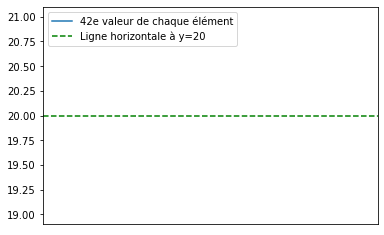

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Sélectionner la 42e valeur de chaque élément dans liste_theta
theta_42_values = [theta[41] for theta in liste_θ]

# Créer une figure et des axes
fig, ax1 = plt.subplots()

# Tracer la 42e valeur de chaque élément sur le premier axe (axe principal)
ax1.plot(theta_42_values, label='42e valeur de chaque élément')

# Ajouter une ligne horizontale pointillée à y=20
ax1.axhline(y=20, linestyle='--', color='green', label='Ligne horizontale à y=20')

# Ajouter une légende pour le premier axe
ax1.legend(loc='upper left')

# Définir l'axe des x avec les dates et heures souhaitées
start_date = '2024-02-01 12:00:00'
hours = range(len(theta_42_values))
date_rng = pd.date_range(start=start_date, periods=len(theta_42_values), freq='24H')
plt.xticks(hours, date_rng, rotation=45, ha='right')  # Utilisation de pandas pour gérer les dates

# Afficher le graphique
plt.show()



In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DayLocator
from matplotlib.ticker import MaxNLocator

# Votre code existant...

theta_ext_values = [data_h[1] for data_h in data]

print(theta_ext_values)


# Définir l'axe des x avec les dates et heures souhaitées
start_date = '2024-02-01 12:00:00'
hours = range(len(theta_42_values))
date_rng = pd.date_range(start=start_date, periods=len(theta_42_values), freq='1H')

# Créer une figure et des axes
fig, ax1 = plt.subplots()

# Tracer la 42e valeur de chaque élément sur le premier axe (axe principal)
ax1.plot(theta_42_values, label='42e valeur de chaque élément')

# Ajouter une ligne horizontale pointillée à y=20
ax1.axhline(y=20, linestyle='--', color='green', label='Ligne horizontale à y=20')

# Ajouter une légende pour le premier axe
ax1.legend(loc='upper left')

# Utiliser DayLocator pour définir la localisation des graduations des jours
ax1.xaxis.set_major_locator(DayLocator())

# Utiliser MaxNLocator pour spécifier le nombre maximal de graduations sur l'axe x
ax1.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Changer ce nombre selon vos préférences

# Formater les dates sur l'axe x
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d'))

ax2 = ax1.twinx()


# Tracer les variations de température sur le deuxième axe y
ax2.plot(theta_ext_values,label='Variations de température', color='red')



# Afficher le graphique
plt.xticks(rotation=45, ha='right')  # Rotation des dates
plt.show()


NameError: name 'data' is not defined

In [31]:
print(theta_ext_values)

fig, ax2 = plt.subplots()


# Tracer les variations de température sur le deuxième axe y
ax2.plot(theta_ext_values,label='Variations de température', color='red')

NameError: name 'theta_ext_values' is not defined

## V.4. Discussions sur les tentatives

Bien que le professeur nous ait fourni un code facilitant la modélisation dynamique du cube thermique en utilisant un circuit électrique, nous avons rencontré des difficultés à l'adapter à notre propre implémentation en raison de divergences dans la nature des variables. Les incompatibilités entre le code fourni et notre modélisation ont compliqué la résolution des équations différentielles liées aux capacités thermiques du cube.

Face à ces défis, nous avons exploré plusieurs approches pour résoudre les équations différentielles du système. Cependant, malgré nos efforts, la nature non linéaire de ces équations a rendu leur résolution exacte inatteignable jusqu'à présent. Bien que le code du professeur puisse représenter une solution potentiell, sa complexité et les différences majeures dans la structure des données nous ont amenés à prendre la décision collective de nous concentrer sur le cas stationnaire de notre étude.

Ainsi, la modélisation dynamique du cube thermique, bien que théoriquement envisageable, a été mise de côté en faveur d'une approche plus réalisable axée sur le régime stationnaire. L'utilisation d'un code entièrement créé et pensé par nos soins a donc été privilégiée. Cette décision, motivée par des considérations de praticité, n'écarte pas la possibilité d'une étude approfondie du comportement dynamique du système dans le cadre de travaux futurs. 

La matrice C n'a donc pas été exploitée puisqu'elle n'intrervient que dans le calcul dynammique. De plus, l'utilisation d'un régulateur a été abandonnée puisque les résultats n'étaient pas concluants. La température obtenue variait entre 15 et 30°C, ce qui n'est absolument pas satisfaisant pour un modèle visant à stabiliser la température autour de 20°C. Ce système a été remplacé par un système de chauffage/climatisation, dont la puissance est calculée par une méthode itérative (à 10W près).

# Conclusion 

En concluant notre projet de modélisation thermique du cube, nous avons d'abord abordé le cas stationnaire, calculant avec succès les températures pour un état thermique stable. Cette première phase nous a permis de comprendre les échanges de chaleur à l'intérieur du cube dans des conditions constantes.

Par la suite, afin de rendre notre modèle plus représentatif du monde réel, nous avons introduit un jeu de données temporelles comprenant des paramètres tels que la température extérieure et les flux radiatifs, collectés à chaque heure sur une période de 7 jours. En considérant chaque heure comme un cas stationnaire, nous avons pu calculer les températures sans chauffage/climatisation, puis déterminer la puissance nécessaire pour maintenir la température autour de 20°C.

Les résultats obtenus à partir de cette approche temporelle nous ont fourni des informations détaillées sur les besoins en chauffage et climatisation du cube tout au long de la période d'étude. Cependant, en raison des défis rencontrés dans la modélisation dynamique, nous avons pris la décision pragmatique de nous concentrer sur le cas stationnaire pour cette étude spécifique.

En réfléchissant sur notre démarche, il est important de noter que notre modèle, bien que simplifié, offre des perspectives intéressantes sur la gestion thermique d'un espace confiné. Les résultats obtenus ouvrent la voie à des analyses plus approfondies, notamment la modélisation dynamique du cube, qui pourrait être abordée dans des travaux futurs. En fin de compte, ce projet nous a permis de combiner des concepts de thermique du bâtiment avec des techniques de modélisation, élargissant ainsi notre compréhension des dynamiques thermiques à l'intérieur d'un espace clos.